<a href="https://colab.research.google.com/github/VedantWani/Swarm-Intelligence/blob/master/Particle_Swarm_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [0]:
def CostFunction(position):
  total = 0
  
  for i in range(len(position)):
    total+=position[i]**2
  return total
  #return (position[0] - 0.1)**2 + (position[1] - 2)**2;


In [0]:
def BunchPosition():
  tx.append(Swarm[i].position[0])
  ty.append(Swarm[i].position[1])
  tz.append(Swarm[i].position[2])

def updatePosition(tx, ty, tz):
  xs.append(np.array(tx))
  ys.append(np.array(ty))
  zs.append(np.array(tz))
 

In [0]:
  class Particle:
    pass

In [0]:
BestSolution = []

In [0]:
gBest = Particle()

In [0]:
gBest.cost = float('inf')

In [0]:
#problem definition

Dim = 2
varsize = 3

DimMin = -5
DimMax = 5

In [0]:
#PSO Parameters
swarm_size = 50
max_iter = 1000
c1 = 2
c2 = 2
W = 1

In [0]:
#initialization of swarm
xs = []
ys = []
zs = []
tx = []
ty = []
tz = []

Swarm = []

for i in range(swarm_size):
  particle = Particle()

  particle.position = np.random.uniform(DimMin, DimMax, varsize)
  particle.velocity = np.random.uniform(DimMin, DimMax, varsize)
  
  #fitness
  particle.cost = CostFunction(particle.position)
  
  #initialize pbest(same as position)
  particle.pbest = particle.position
  particle.pbestCost = particle.cost

  #update gbest

  if particle.pbestCost < gBest.cost:
    gBest.cost = particle.pbestCost
    gBest.position = particle.pbest
  
  Swarm.append(particle)
  BunchPosition()
updatePosition(tx, ty, tz)
tx,ty,tz = [],[],[]



In [0]:
for it in range(0,max_iter):
  for i in range(0, swarm_size):
    
    #velocity update
    Swarm[i].velocity = W * Swarm[i].velocity + c1 * np.random.rand(varsize) * (Swarm[i].pbest - Swarm[i].position) + c2 * np.random.rand(varsize) * (gBest.position - Swarm[i].position)

    #position update
    Swarm[i].position = Swarm[i].position + Swarm[i].velocity

    #make sure position is within bounds
    Swarm[i].position = np.maximum(Swarm[i].position,DimMin)
    Swarm[i].position = np.minimum(Swarm[i].position,DimMax)

    #valuate fitness
    Swarm[i].cost = CostFunction(Swarm[i].position)

    #update pbest
    if Swarm[i].cost < Swarm[i].pbestCost:
      Swarm[i].pbestCost = Swarm[i].cost
      Swarm[i].pbest = Swarm[i].position

    #update gbest
    if Swarm[i].pbestCost < gBest.cost:
      gBest.cost = Swarm[i].pbestCost
      gBest.position = Swarm[i].pbest
    BunchPosition()
  updatePosition(tx, ty, tz)
  tx,ty,tz = [],[],[]

  BestSolution.append(gBest.cost)


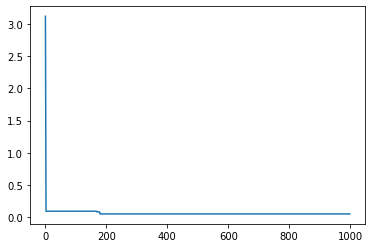

In [88]:

plt.plot(BestSolution)


In [89]:
gBest.position

array([-0.12930326, -0.04080446,  0.1726582 ])

In [90]:
gBest.cost

0.04819519064272243

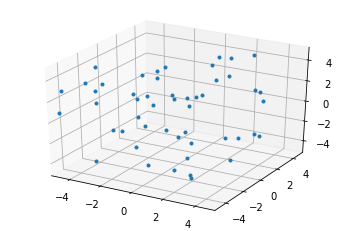

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot([], [], [], "o", markersize=3)
def update(ifrm, xa, ya, za):
    #print(ifrm)
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ani = animation.FuncAnimation(fig, update, frames=max_iter, fargs=(xs,ys,zs), interval = 100)
HTML(ani.to_html5_video())